In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("/workspaces/chronic_absenteeism/chronicabsenteeism24.txt", delimiter="\t", encoding="ISO-8859-1")
df

,Academic Year,Aggregate Level,County Code,District Code,School Code,County Name,District Name,School Name,Charter School,DASS,Reporting Category,ChronicAbsenteeismEligibleCumulativeEnrollment,ChronicAbsenteeismCount,ChronicAbsenteeismRate
0,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GF,2893392,590593,20.4
1,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GM,3059188,623926,20.4
2,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GR13,1252549,219754,17.5
3,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GR46,1311437,209968,16
4,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GR78,896631,172257,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343597,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SE,19,5,26.3
343598,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SF,*,*,*
343599,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SH,25,9,36
343600,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SS,265,74,27.9


In [20]:
cleaned_df = df.copy()
cleaned_df.columns = cleaned_df.columns.str.lower().str.replace(" ", "_")
cleaned_df.rename(columns={"chronicabsenteeismeligiblecumulativeenrollment": "abs_cumulative_enrollment",
                           "chronicabsenteeismcount": "abs_count",
                           "chronicabsenteeismrate": "abs_rate"
                           }, inplace=True)

cleaned_df

,academic_year,aggregate_level,county_code,district_code,school_code,county_name,district_name,school_name,charter_school,dass,reporting_category,abs_cumulative_enrollment,abs_count,abs_rate
0,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GF,2893392,590593,20.4
1,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GM,3059188,623926,20.4
2,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GR13,1252549,219754,17.5
3,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GR46,1311437,209968,16
4,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,GR78,896631,172257,19.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343597,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SE,19,5,26.3
343598,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SF,*,*,*
343599,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SH,25,9,36
343600,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,Yes,Yes,SS,265,74,27.9


In [30]:
# T = state, C = county, D = district, S = school
cleaned_df["aggregate_level"].value_counts()
# to numeric
cleaned_df[["abs_cumulative_enrollment", "abs_count", "abs_rate"]] = cleaned_df[["abs_cumulative_enrollment", "abs_count", "abs_rate"]].apply(pd.to_numeric, errors="coerce")

# create state level filter and sub dateset
state_filter = cleaned_df["aggregate_level"]== "T"
df_state = cleaned_df.loc[state_filter]

# create county level filter and sub dataset
county_filter = cleaned_df["aggregate_level"]== "C"
df_county = cleaned_df.loc[county_filter]

# summary statistics
#df_state["abs_cumulative_enrollment"].describe()
#df_state["abs_count"].describe()
#df_state["abs_rate"].describe()
df_state.loc[df_state["reporting_category"]=="SF"]


,academic_year,aggregate_level,county_code,district_code,school_code,county_name,district_name,school_name,charter_school,dass,reporting_category,abs_cumulative_enrollment,abs_count,abs_rate
21,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,All,SF,38194.0,14124.0,37.0
47,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,No,SF,35291.0,12180.0,34.5
72,2023-24,T,0,NaN,NaN,State,NaN,NaN,All,Yes,SF,4512.0,2762.0,61.2
98,2023-24,T,0,NaN,NaN,State,NaN,NaN,No,All,SF,35037.0,12833.0,36.6
124,2023-24,T,0,NaN,NaN,State,NaN,NaN,No,No,SF,33149.0,11637.0,35.1
149,2023-24,T,0,NaN,NaN,State,NaN,NaN,No,Yes,SF,3048.0,1749.0,57.4
174,2023-24,T,0,NaN,NaN,State,NaN,NaN,Yes,All,SF,4470.0,1897.0,42.4
199,2023-24,T,0,NaN,NaN,State,NaN,NaN,Yes,No,SF,2859.0,843.0,29.5
224,2023-24,T,0,NaN,NaN,State,NaN,NaN,Yes,Yes,SF,1636.0,1065.0,65.1


In [47]:
# SH - Homeless; SF - Foster
df_state_hm = df_state.loc[df_state["reporting_category"].isin(["SF", "SH"])]
# abs_rate (highly mobile students) = 36.4% - state level


In [49]:
df_county = df_county.loc[(df_county["charter_school"] == "All") & (df_county["dass"] == "All")]
df_county

,academic_year,aggregate_level,county_code,district_code,school_code,county_name,district_name,school_name,charter_school,dass,reporting_category,abs_cumulative_enrollment,abs_count,abs_rate
331897,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,GF,104849.0,20587.0,19.6
331898,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,GM,111525.0,21502.0,19.3
331899,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,GR13,47245.0,8516.0,18.0
331900,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,GR46,48490.0,7295.0,15.0
331901,2023-24,C,1,NaN,NaN,Alameda,NaN,NaN,All,All,GR78,32330.0,5452.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343400,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,All,All,SF,190.0,76.0,40.0
343401,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,All,All,SH,701.0,282.0,40.2
343402,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,All,All,SM,62.0,10.0,16.1
343403,2023-24,C,58,NaN,NaN,Yuba,NaN,NaN,All,All,SS,11147.0,2796.0,25.1


In [50]:
# Rural, suburban, urban

# Define the list of urban counties
urban_counties = [
    "Alameda", "Contra Costa", "Fresno", "Los Angeles", "Orange", "Riverside", 
    "Sacramento", "San Bernardino", "San Diego", "San Francisco", "San Joaquin", 
    "San Mateo", "Santa Clara", "Ventura"
]

# Define the list of suburban counties
suburban_counties = [
    "Butte", "Imperial", "Kern", "Marin", "Merced", "Monterey", "Napa", "Placer",
    "San Luis Obispo", "Santa Barbara", "Santa Cruz", "Shasta", "Solano",
    "Sonoma", "Stanislaus", "Tulare", "Yolo"
]

# Define the list of rural counties
rural_counties = [
    "Alpine", "Amador", "Calaveras", "Colusa", "Del Norte", "El Dorado", "Glenn",
    "Humboldt", "Inyo", "Kings", "Lake", "Lassen", "Madera", "Mariposa", "Mendocino",
    "Modoc", "Mono", "Nevada", "Plumas", "San Benito", "Sierra", "Siskiyou",
    "Sutter", "Tehama", "Trinity", "Tuolumne", "Yuba"
]
# Apply the filter
urban_filter = df_county["county_name"].isin(urban_counties)
# Apply the filter
suburban_filter = df_county["county_name"].isin(suburban_counties)
# Apply the filter
rural_filter = df_county["county_name"].isin(rural_counties)

# create three separate dataset
df_urban = df_county.loc[urban_filter]
df_suburban = df_county.loc[suburban_filter]
df_rural = df_county.loc[rural_filter]




In [70]:
df_urban_hm = df_urban.loc[df_urban["reporting_category"].isin(["SF", "SH"])]
# calculate the average abs_rate across urban counties
urban_hm_rate = df_urban_hm["abs_count"].sum() / df_urban_hm["abs_cumulative_enrollment"].sum()*100
urban_rate = df_urban["abs_count"].sum() / df_urban["abs_cumulative_enrollment"].sum()*100
print("The chronic absenteeism rate among all students is: ", urban_rate) # 21.8%
print("The chronic absenteeism rate among highly mobile students is: ", urban_hm_rate) # 37.8%

The chronic absenteeism rate among all students is:  21.874627390711844
The chronic absenteeism rate among highly mobile students is:  37.828059119275224


In [ ]:
df_suburban_hm = df_suburban.loc[df_suburban["reporting_category"].isin(["SF", "SH"])]
# calculate the average abs_rate across suburban counties
suburban_hm_rate = df_suburban_hm["abs_count"].sum() / df_suburban_hm["abs_cumulative_enrollment"].sum()*100
suburban_rate = df_suburban["abs_count"].sum() / df_suburban["abs_cumulative_enrollment"].sum()*100

print("The chronic absenteeism rate among all students is: ", suburban_rate) #19.0%
print("The chronic absenteeism rate among highly mobile students is: ", suburban_hm_rate)# 28.9%

The chronic absenteeism rate among all students is:  18.99095110787442
The chronic absenteeism rate among highly mobile students is:  28.89451638077946


In [ ]:
df_rural_hm = df_rural.loc[df_rural["reporting_category"].isin(["SF", "SH"])]
# calculate the average abs_rate across rural counties
rural_hm_rate = df_rural_hm["abs_count"].sum() / df_rural_hm["abs_cumulative_enrollment"].sum()*100
rural_rate = df_rural["abs_count"].sum() / df_rural["abs_cumulative_enrollment"].sum()*100

print("The chronic absenteeism rate among all students is: ", rural_rate) #22.4%
print("The chronic absenteeism rate among highly mobile students is: ",rural_hm_rate)# 40.9%

The chronic absenteeism rate among all students is:  22.35243581057583
The chronic absenteeism rate among highly mobile students is:  40.89340101522843


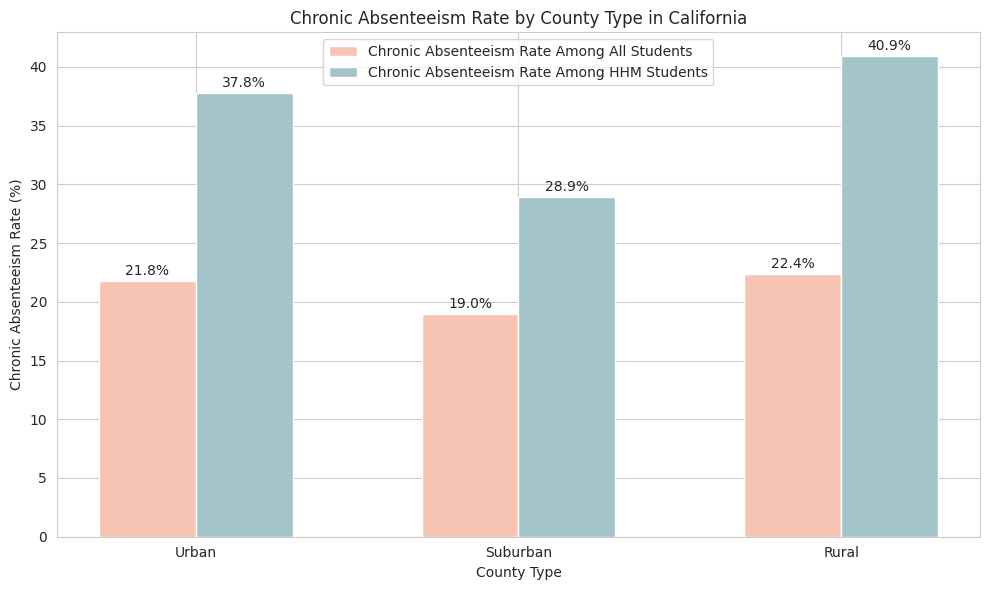

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define absenteeism rates and additional data (for example, let's say these are two different absenteeism rates)
categories = ["Urban", "Suburban", "Rural"]
hm_absenteeism_rates = [37.8, 28.9, 40.9]  # HHM absenteeism rates
all_absenteeism_rates = [21.8, 19.0, 22.4]  # All students absenteeism rates

# Set Seaborn style
sns.set_style("whitegrid")

# Define width and spacing
bar_width = 0.3  # Adjust bar width
index = np.arange(len(categories))  # Position for each group

# Create bar plot
plt.figure(figsize=(10, 6))

# Plot the first set of bars (for all students absenteeism rates)
plt.bar(index - bar_width / 2, all_absenteeism_rates, bar_width, label="Chronic Absenteeism Rate Among All Students", color='#f7c4b3')

# Plot the second set of bars (for HHM students absenteeism rates)
plt.bar(index + bar_width / 2, hm_absenteeism_rates, bar_width, label="Chronic Absenteeism Rate Among HHM Students", color='#a3c4c9')

# Add labels and title
plt.ylabel("Chronic Absenteeism Rate (%)")
plt.xlabel("County Type")
plt.title("Chronic Absenteeism Rate by County Type in California")

# Customize x-axis ticks and labels
plt.xticks(index, categories)

# Display values on top of bars
for i, (rate1, rate2) in enumerate(zip(all_absenteeism_rates, hm_absenteeism_rates)):
    # Adjust the text position slightly for each bar
    plt.text(i - bar_width / 2, rate1 + 0.5, f"{rate1}%", ha='center', fontsize=10)
    plt.text(i + bar_width / 2, rate2 + 0.5, f"{rate2}%", ha='center', fontsize=10)

# Show legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
# GRKN = Kindergarten (GRK prior to 2020–21)
# GR13 = Grades 1–3
# GR46 = Grades 4–6
# GR78 = Grades 7–8
# GRK8 = Grades K–8
# GR912 = Grades 9–12
# GRUG = Ungraded Elementary and Secondary (Retired in 2017–18)
df_grade = df_county.loc[df_county["reporting_category"].isin(["GRKN","GR13","GR46","GR78","GR912"])]
grade_rate = df_grade["abs_count"].sum() / df_grade["abs_cumulative_enrollment"].sum()*100
print("The chronic absenteeism rate among K to 12th grade students is: ", grade_rate)# 20.0%

The chronic absenteeism rate among K to 12th grade students is:  20.007385858204334
The chronic absenteeism rate among K to 12th grade HHM students is:  nan


/tmp/ipykernel_5649/1085759059.py:13: RuntimeWarning: invalid value encountered in scalar divide
  hm_grade_rate = df_hm_grade["abs_count"].sum(skipna=True) / df_hm_grade["abs_cumulative_enrollment"].sum(skipna=True)*100


,academic_year,aggregate_level,county_code,district_code,school_code,county_name,district_name,school_name,charter_school,dass,reporting_category,abs_cumulative_enrollment,abs_count,abs_rate


In [ ]:

df_GRK6 = df_county.loc[df_county["reporting_category"].isin(["GRKN","GR13","GR46"])]
GRK6_rate = df_GRK6["abs_count"].sum() / df_GRK6["abs_cumulative_enrollment"].sum()*100
print("The chronic absenteeism rate among K to 6th grade students is: ",GRK6_rate)# 16.9%

In [ ]:
df_GR712 = df_county.loc[df_county["reporting_category"].isin(["GR78","GR912"])]
GR712_rate = df_GR712["abs_count"].sum() / df_GR712["abs_cumulative_enrollment"].sum()*100
print("The chronic absenteeism rate among 6th to 12th grade students is: ",GR712_rate)# 22.8%


The chronic absenteeism rate among 6th to 12th grade students is:  22.780981379715463


/tmp/ipykernel_5649/2495610326.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=absenteeism_rates, palette=["#a3c4c9", "#f7c4b3", "#d7bde2"], width = 0.5)


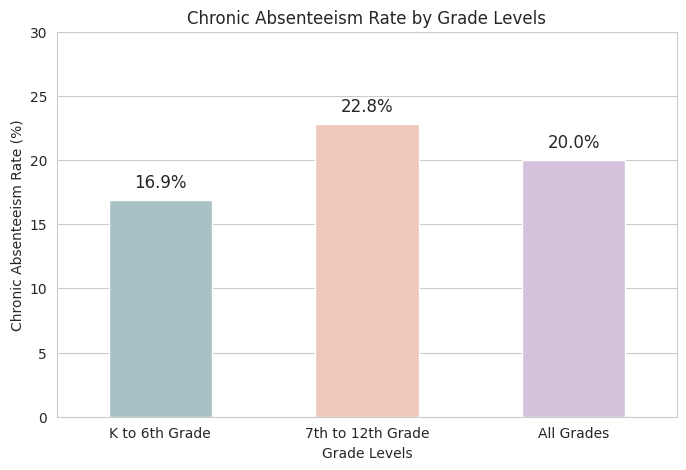

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define absenteeism rates and categories
categories = ["K to 6th Grade", "7th to 12th Grade", "All Grades"]
absenteeism_rates = [16.9, 22.8, 20.0]

# Set Seaborn style
sns.set_style("whitegrid")

# Create bar plot using the pastel colors
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=absenteeism_rates, palette=["#a3c4c9", "#f7c4b3", "#d7bde2"], width = 0.5)

# Add labels and title
plt.ylabel("Chronic Absenteeism Rate (%)")
plt.xlabel("Grade Levels")
plt.title("Chronic Absenteeism Rate by Grade Levels")
plt.ylim(0, 30)  # Set y-axis limit for better visualization

# Display values on bars
for i, rate in enumerate(absenteeism_rates):
    plt.text(i, rate + 1, f"{rate}%", ha='center', fontsize=12)

# Show plot
plt.show()
